# A) API Zugriff im lokalen Netzwerk 

# Das sind die Inhalte:
## Sensor- Werte auslesen und speichern
1. request an das REST API senden und "return-object" analysieren
2. dictionary mit json.loads aus dem "return-object" erzeugen
3. dekodierte Sensor - Messwerte mit "print" ausgeben
4. Messwerte als .json file ablegen
5. Messwerte fortlaufend in einem .db file mitschreiben

### ->Arbeitsaufgabe 1 "Sensor - Werte speichern"

*Ersetze die "dummy-Werte" durch echte Sensordaten. 
Speichere die Werte für Luftfeuchtigkeit, Temperatur und Helligkeit:*
1. initialisiere ein neues .git repository und lege das "source" - file darin ab
2. speichere die Sensor - Werte in einem .json File "a_nachname_sensorwerte.json"
3. speichere die Sensor - Werte in einer sqlite Datenbank "a_nachname_sendorwerte.db"
4. füge das .json und .db file deinem git repository hinzu und führe ein commit durch. "-m "Arbeitsaufgabe Teil 1 Nachname"


Das Abfrageintervall ist eine Minute. Die Dauer der Aufzeichnung ist vor dem Start der Aufzeichnung
individuell mit dem Lehrer zu vereinbaren.



 

### A1) request an das REST API senden und "return-object" analysieren

In [21]:
import requests
import json
import time
#Die Authentifizierung wird im lokalen Netzwerk noch nicht benötigt, aber im nächsten Schritt
#from requests.auth import HTTPBasicAuth


In [22]:
my_hum_url = 'http://openhabian:8080/rest/items/ZWave_Node_003_Sensor_relative_humidity'
my_temp_url = 'http://openhabian:8080/rest/items/ZWave_Node_003_Sensor_temperature'

#my_hum_url='http://192.168.68.112:8080/rest/items/ZWaveNode019WohnzimmerZW100Multisensor6_Sensorrelativehumidity'
#my_temp_url='http://192.168.68.112:8080/rest/items/ZWaveNode019WohnzimmerZW100Multisensor6_Sensortemperature'
 

In [23]:
hum_value=requests.get(my_hum_url)
temp_value=requests.get(my_temp_url)
# Das JSON-Objekt wird über die Ausgabe der Requests-Objekt übergeben

In [24]:
print(hum_value.content)
print(temp_value.content)

b'{"link":"http://openhabian:8080/rest/items/ZWave_Node_003_Sensor_relative_humidity","state":"50","stateDescription":{"pattern":"%.1f","readOnly":true,"options":[]},"metadata":{"semantics":{"value":"Point","config":{"isPointOf":"ZWave_Node_003"}}},"editable":true,"type":"Number","name":"ZWave_Node_003_Sensor_relative_humidity","label":"Sensor (relative humidity)","category":"Humidity","tags":["Point"],"groupNames":["ZWave_Node_003"]}'
b'{"link":"http://openhabian:8080/rest/items/ZWave_Node_003_Sensor_temperature","state":"18.9 \xc2\xb0C","stateDescription":{"pattern":"%.1f %unit%","readOnly":true,"options":[]},"unitSymbol":"\xc2\xb0C","metadata":{"semantics":{"value":"Point","config":{"isPointOf":"ZWave_Node_003"}}},"editable":true,"type":"Number:Temperature","name":"ZWave_Node_003_Sensor_temperature","label":"Sensor (temperature)","category":"Temperature","tags":["Point"],"groupNames":["ZWave_Node_003"]}'


In [25]:
#TESTSTRING - AUSGEBEN
temp_dict=json.loads(temp_value.content)
act_temp = temp_dict['state']
act_temp = float(act_temp[:-2])
print(act_temp)
print(type(act_temp))

18.9
<class 'float'>


### A2) dictionary mit json.loads aus dem "return-object" erzeugen

In [26]:
import sqlite3
import time
#cnx = sqlite3.connect(':memory:') alternative in memory database
sqlite_db = 'a_sensor_values.db' # String for creating DB in specified directory
print(sqlite_db)

conn=sqlite3.connect(sqlite_db) # Creates sqlite Database - check in your file explorer
cur=conn.cursor()
#cur.execute('''DROP TABLE IF EXISTS sensor_values''')
#cur.execute('''CREATE TABLE sensor_values(timestamp NUMERIC,temperature NUMERIC, humidity NUMERIC);''') # Create table with specified name and columns/attributes
# 

for my_counter in range(30):
    time.sleep(60)
    my_timestamp = round(time.time())
    hum_value=requests.get(my_hum_url)
    temp_value=requests.get(my_temp_url)
    hum_dict=json.loads(hum_value.content)
    act_hum = hum_dict['state']
    temp_dict=json.loads(temp_value.content)
    act_temp = temp_dict['state']
    act_temp = float(act_temp[:-2]) 
     # The temperature value is stored without the "C" in the end.
     # The temperature value is in degrees centi-degrees.

    
# CREATE INSERT STATEMENT
    execution_string = f"INSERT INTO sensor_values VALUES ({my_timestamp}, {act_temp}, {act_hum})"
    print(execution_string)
    cur.execute(execution_string)
    conn.commit()

a_sensor_values.db
INSERT INTO sensor_values VALUES (1718180937, 19.0, 50)
INSERT INTO sensor_values VALUES (1718181001, 19.0, 50)
INSERT INTO sensor_values VALUES (1718181069, 19.0, 50)


KeyboardInterrupt: 

In [2]:
import pandas as pd
import sqlite3
import time
#cnx = sqlite3.connect(':memory:') alternative in memory database
sqlite_db = 'a_sensor_values.db' # String for creating DB in specified directory
print(sqlite_db)

conn=sqlite3.connect(sqlite_db) # Creates sqlite Database - check in your file explorer
cur=conn.cursor()
# retrieve values via pd library from local database
pd.read_sql("SELECT * FROM sensor_values;", conn)


a_sensor_values.db


,timestamp,temperature,humidity
0,1717580019,25.0,50
1,1717580732,24.8,46
2,1717580797,24.9,46
3,1717580858,24.8,47
4,1717580919,24.8,47
5,1717580981,24.8,47
6,1717581042,24.8,47
7,1717581103,24.8,48
8,1717581165,24.8,48
9,1717581226,24.9,48


timestamp      1.717580e+09
temperature    2.500000e+01
humidity       5.000000e+01
Name: 0, dtype: float64
0:00:00
timestamp      1.717581e+09
temperature    2.480000e+01
humidity       4.600000e+01
Name: 1, dtype: float64
0:11:53
timestamp      1.717581e+09
temperature    2.490000e+01
humidity       4.600000e+01
Name: 2, dtype: float64
0:12:58
timestamp      1.717581e+09
temperature    2.480000e+01
humidity       4.700000e+01
Name: 3, dtype: float64
0:13:59
timestamp      1.717581e+09
temperature    2.480000e+01
humidity       4.700000e+01
Name: 4, dtype: float64
0:15:00
timestamp      1.717581e+09
temperature    2.480000e+01
humidity       4.700000e+01
Name: 5, dtype: float64
0:16:02
timestamp      1.717581e+09
temperature    2.480000e+01
humidity       4.700000e+01
Name: 6, dtype: float64
0:17:03
timestamp      1.717581e+09
temperature    2.480000e+01
humidity       4.800000e+01
Name: 7, dtype: float64
0:18:04
timestamp      1.717581e+09
temperature    2.480000e+01
humidity       4

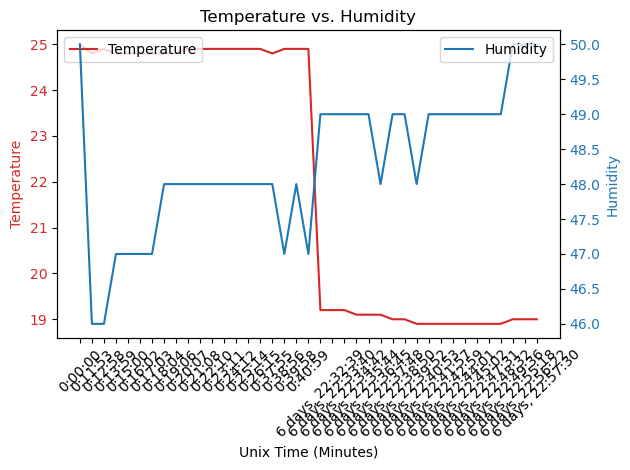

In [3]:
import matplotlib.pyplot as plt
import datetime
plot_df=pd.read_sql("SELECT * FROM sensor_values;", conn)

timestamps=[]
for i,row in plot_df.iterrows():
   print(row)
   first_time= plot_df.iloc[0]['timestamp']
   second_time= plot_df.iloc[i]['timestamp']  
   duration =  int(second_time - first_time)
   calc_seconds=str(datetime.timedelta(seconds=duration))
   print(calc_seconds)
   timestamps.append(calc_seconds)


# Create the chart
fig, ax1 = plt.subplots()
ax1.set_title('Temperature vs. Humidity')
color = 'tab:red'
ax1.set_xlabel('Unix Time (Minutes)')
ax1.set_ylabel('Temperature', color=color)
ax1.plot(timestamps,plot_df['temperature'], color=color)
ax1.tick_params(axis='y', labelcolor=color) # changes style and color of y-axis label
ax1.tick_params(axis='x', labelrotation=45)
# Create another line for the Humidity

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Humidity', color=color)  # we already handled the x-label with ax1
ax2.plot(timestamps,plot_df['humidity'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(['Temperature'], loc='upper left')
ax2.legend(['Humidity'], loc='upper right')

plt.show()


In [4]:
#Write to Excel Sheet
%pip install openpyxl
#import openpype.pipeline as pypeline  # pip install openpype.pipeline to install openpype.pipeline. For windows

plot_df=pd.read_sql("SELECT * FROM sensor_values;", conn)
df=plot_df.to_excel('05b_plotting.xlsx')    

Note: you may need to restart the kernel to use updated packages.
